In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Dataset_Uber Traffic (1).csv")

In [237]:
df

,DateTime,Junction,Vehicles,ID
0,01/11/15 0:00,1,15,20151101001
1,01/11/15 1:00,1,13,20151101011
2,01/11/15 2:00,1,10,20151101021
3,01/11/15 3:00,1,7,20151101031
4,01/11/15 4:00,1,9,20151101041
...,...,...,...,...
48115,30/06/17 19:00,4,11,20170630194
48116,30/06/17 20:00,4,30,20170630204
48117,30/06/17 21:00,4,16,20170630214
48118,30/06/17 22:00,4,22,20170630224


# Missing Value Analysis

In [239]:
missing_values = df.isnull().sum()

In [240]:
missing_values

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [241]:
na_values = df.isna().sum()

In [242]:
na_values

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [243]:
duplicates = df.duplicated().sum()

In [244]:
duplicates

0

### As we can see no missing values , no duplicates and no NA values we can move forward

In [246]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# Lets segregate them into hourly intervals

In [249]:
print(df['ID'].min(), df['ID'].max())

20151101001 20170630234


In [250]:
df['ID'] = df['ID'].astype(str)

In [251]:
df['ID'] = df['ID'].str.zfill(12)

In [252]:
print(df['ID'].astype(str).str[:15].unique()[:10])

['020151101001' '020151101011' '020151101021' '020151101031'
 '020151101041' '020151101051' '020151101061' '020151101071'
 '020151101081' '020151101091']


In [253]:
df['DateTime'] = pd.to_datetime(df['ID'].str[1:11], format='%Y%m%d%H')

In [254]:
df['Hour'] = df['DateTime'].dt.floor('H')

C:\Users\hp\AppData\Local\Temp\ipykernel_10104\2474612736.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Hour'] = df['DateTime'].dt.floor('H')


In [255]:
Traffic_Hourly = df.groupby(['Hour', 'Junction'])['Vehicles'].sum().reset_index()

In [256]:
print(Traffic_Hourly)

                     Hour  Junction  Vehicles
0     2015-11-01 00:00:00         1        15
1     2015-11-01 00:00:00         2         6
2     2015-11-01 00:00:00         3         9
3     2015-11-01 01:00:00         1        13
4     2015-11-01 01:00:00         2         6
...                   ...       ...       ...
48115 2017-06-30 22:00:00         4        22
48116 2017-06-30 23:00:00         1        78
48117 2017-06-30 23:00:00         2        27
48118 2017-06-30 23:00:00         3        39
48119 2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]


In [257]:
Traffic_Hourly['Standardized_Vehicles'] = Traffic_Hourly.groupby('Junction')['Vehicles'].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [258]:
print(Traffic_Hourly[['Junction', 'Vehicles', 'Standardized_Vehicles']].head(10))

   Junction  Vehicles  Standardized_Vehicles
0         1        15              -1.306174
1         2         6              -1.115103
2         3         9              -0.449790
3         1        13              -1.393099
4         2         6              -1.115103
5         3         7              -0.641434
6         1        10              -1.523487
7         2         5              -1.250215
8         3         5              -0.833078
9         1         7              -1.653874


In [259]:
# This shows that at Junction 1, even values like 15 or 13 vehicles are below the mean, meaning that Junction 1 likely has higher overall traffic,
# and these values are relatively low compared to its average.

#Similarly, for Junctions 2 and 3, the same logic applies.

In [260]:
df['HourOfTheDay'] = df['DateTime'].dt.hour                  
df['DayOfWeek'] = df['DateTime'].dt.dayofweek          
df['Month'] = df['DateTime'].dt.month                   


In [261]:
# Weekends: Saturday is 5 and Sunday is 6
df['Weekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

In [262]:
df.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1


In [263]:
df.head(30)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1
5,2015-11-01 05:00:00,1,6,020151101051,2015-11-01 05:00:00,5,6,11,1
6,2015-11-01 06:00:00,1,9,020151101061,2015-11-01 06:00:00,6,6,11,1
7,2015-11-01 07:00:00,1,8,020151101071,2015-11-01 07:00:00,7,6,11,1
8,2015-11-01 08:00:00,1,11,020151101081,2015-11-01 08:00:00,8,6,11,1
9,2015-11-01 09:00:00,1,12,020151101091,2015-11-01 09:00:00,9,6,11,1


# lets add special holidays 

In [265]:
specialHolidays = pd.to_datetime([
    '2015-01-26', '2015-03-06', '2015-04-03', '2015-07-18', '2015-08-15',
    '2015-09-25', '2015-10-02', '2015-10-22', '2015-11-11', '2015-12-25',
    '2016-01-26', '2016-03-24', '2016-03-25', '2016-07-06', '2016-08-15',
    '2016-09-13', '2016-10-02', '2016-10-11', '2016-10-30', '2016-12-25',
    '2017-01-26', '2017-03-13', '2017-04-14', '2017-06-26', '2017-08-15',
    '2017-09-02', '2017-10-02', '2017-09-30', '2017-10-19', '2017-12-25','2015-04-14', '2016-04-14']) 
df['specialHolidays'] = df['DateTime'].dt.date.isin(specialHolidays.date).astype(int)

In [266]:
df.tail(100)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays
48020,2017-06-26 20:00:00,4,9,020170626204,2017-06-26 20:00:00,20,0,6,0,1
48021,2017-06-26 21:00:00,4,8,020170626214,2017-06-26 21:00:00,21,0,6,0,1
48022,2017-06-26 22:00:00,4,10,020170626224,2017-06-26 22:00:00,22,0,6,0,1
48023,2017-06-26 23:00:00,4,10,020170626234,2017-06-26 23:00:00,23,0,6,0,1
48024,2017-06-27 00:00:00,4,9,020170627004,2017-06-27 00:00:00,0,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,020170630194,2017-06-30 19:00:00,19,4,6,0,0
48116,2017-06-30 20:00:00,4,30,020170630204,2017-06-30 20:00:00,20,4,6,0,0
48117,2017-06-30 21:00:00,4,16,020170630214,2017-06-30 21:00:00,21,4,6,0,0
48118,2017-06-30 22:00:00,4,22,020170630224,2017-06-30 22:00:00,22,4,6,0,0


In [267]:
df = df.sort_values(['Junction', 'DateTime'])

lags = [1, 2, 3, 6, 12, 24, 48]

for lag in lags:
    df[f'VehiclesLag_{lag}'] = df.groupby('Junction')['Vehicles'].shift(lag)


In [268]:
for lag in lags:
    df[f'VehicleDiff_{lag}'] = df['Vehicles'] - df[f'VehiclesLag_{lag}']

In [269]:
df.head(30)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehiclesLag_12,VehiclesLag_24,VehiclesLag_48,VehicleDiff_1,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1,0,...,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1,0,...,NaN,NaN,NaN,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1,0,...,NaN,NaN,NaN,-3.0,-6.0,-8.0,NaN,NaN,NaN,NaN
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1,0,...,NaN,NaN,NaN,2.0,-1.0,-4.0,NaN,NaN,NaN,NaN
5,2015-11-01 05:00:00,1,6,020151101051,2015-11-01 05:00:00,5,6,11,1,0,...,NaN,NaN,NaN,-3.0,-1.0,-4.0,NaN,NaN,NaN,NaN
6,2015-11-01 06:00:00,1,9,020151101061,2015-11-01 06:00:00,6,6,11,1,0,...,NaN,NaN,NaN,3.0,0.0,2.0,-6.0,NaN,NaN,NaN
7,2015-11-01 07:00:00,1,8,020151101071,2015-11-01 07:00:00,7,6,11,1,0,...,NaN,NaN,NaN,-1.0,2.0,-1.0,-5.0,NaN,NaN,NaN
8,2015-11-01 08:00:00,1,11,020151101081,2015-11-01 08:00:00,8,6,11,1,0,...,NaN,NaN,NaN,3.0,2.0,5.0,1.0,NaN,NaN,NaN
9,2015-11-01 09:00:00,1,12,020151101091,2015-11-01 09:00:00,9,6,11,1,0,...,NaN,NaN,NaN,1.0,4.0,3.0,5.0,NaN,NaN,NaN


In [270]:
diff_cols = [f'VehicleDiff_{lag}' for lag in lags]
df[diff_cols] = df.groupby('Junction')[diff_cols].transform(lambda x: x.ffill())


In [271]:
df.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehiclesLag_12,VehiclesLag_24,VehiclesLag_48,VehicleDiff_1,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48
0,2015-11-01 00:00:00,1,15,020151101001,2015-11-01 00:00:00,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-01 01:00:00,1,13,020151101011,2015-11-01 01:00:00,1,6,11,1,0,...,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-01 02:00:00,1,10,020151101021,2015-11-01 02:00:00,2,6,11,1,0,...,NaN,NaN,NaN,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
3,2015-11-01 03:00:00,1,7,020151101031,2015-11-01 03:00:00,3,6,11,1,0,...,NaN,NaN,NaN,-3.0,-6.0,-8.0,NaN,NaN,NaN,NaN
4,2015-11-01 04:00:00,1,9,020151101041,2015-11-01 04:00:00,4,6,11,1,0,...,NaN,NaN,NaN,2.0,-1.0,-4.0,NaN,NaN,NaN,NaN


In [272]:
# df[diff_cols] = df[diff_cols].fillna(0)


In [273]:
# Visulaization

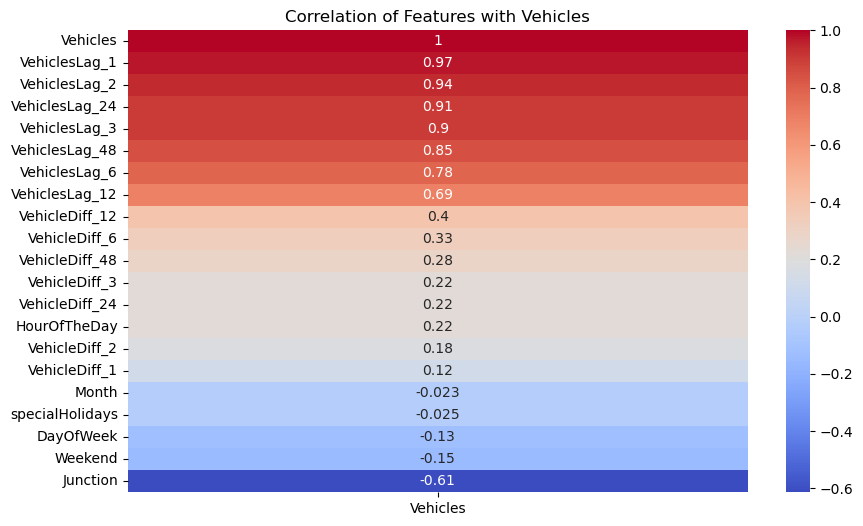

In [274]:
corr_matrix = df.corr(numeric_only=True)

# Visualize correlation with target variable
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['Vehicles']].sort_values(by='Vehicles', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Vehicles')
plt.show()


In [275]:
#using xgboost for model based analysis

In [276]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [277]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# features: excluding target(Vehicles) and datetime
features = [col for col in df.columns if col not in ['DateTime', 'Vehicles']]

df_model = df.dropna(subset=features + ['Vehicles'])

X = df_model[features]
y = df_model['Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [278]:
X = X.drop(columns=['ID', 'DateTime'], errors='ignore')


In [279]:
feature_cols = [col for col in df.columns if col not in ['DateTime', 'Vehicles', 'ID']]
df_model = df.dropna(subset=feature_cols + ['Vehicles'])

X = df_model[feature_cols]
y = df_model['Vehicles']


In [280]:
df['Hour'] = pd.to_datetime(df['Hour'], errors='coerce').dt.hour


In [281]:
feature_cols = [col for col in df.columns if col not in ['DateTime', 'Vehicles', 'ID']]


In [282]:
df_model = df.dropna(subset=feature_cols + ['Vehicles'])

X = df_model[feature_cols]
y = df_model['Vehicles']

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [283]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.55
MAE: 0.16
R² Score: 1.00


<Figure size 1200x800 with 0 Axes>

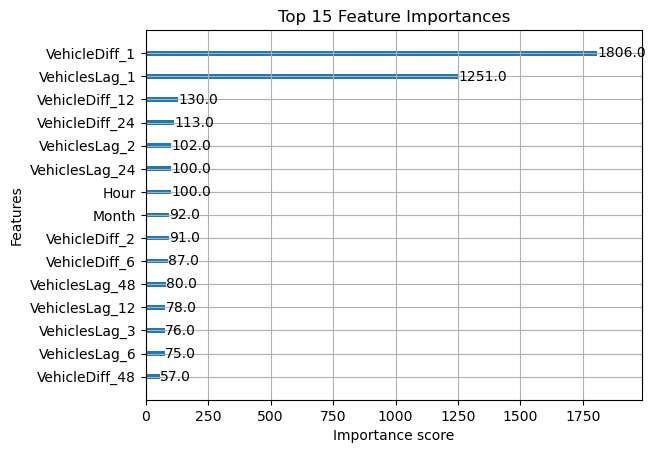

In [284]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_importance(xgb_model, max_num_features=15)
plt.title("Top 15 Feature Importances")
plt.show()


In [285]:
#VehicleDiff_1	
#VehiclesLag_1	
#These two seem to have the highest importance score therefore are the most important features of the model.

In [286]:
# We will be adding weather and special events data

In [287]:
weather_df = pd.read_csv(r"C:\Users\hp\Desktop\DOCUMENTS&FOLDERS\Uber_Project\delhi_weather_data_nov2015_to_jun2017_new.csv")

In [288]:
weather_df.head()

,DateTime,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h)
0,1/11/2015 0:00,29.5,78.3,0.46,6.4
1,1/11/2015 1:00,27.5,56.3,0.33,6.7
2,1/11/2015 2:00,29.7,66.0,0.00,6.5
3,1/11/2015 3:00,31.0,55.0,0.19,5.8
4,1/11/2015 4:00,32.9,62.4,0.12,5.6


In [289]:
df.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehiclesLag_12,VehiclesLag_24,VehiclesLag_48,VehicleDiff_1,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,-3.0,-5.0,NaN,NaN,NaN,NaN,NaN
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,-3.0,-6.0,-8.0,NaN,NaN,NaN,NaN
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,2.0,-1.0,-4.0,NaN,NaN,NaN,NaN


In [290]:
# Ensure proper parsing with dayfirst=True
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'], dayfirst=True)

# This line is optional — pandas will automatically display the datetime in the correct format when printed
# but if you need it as a string column in exact 'YYYY-MM-DD HH:MM:SS' format, use:
weather_df['DateTime'] = weather_df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [291]:
weather_df.head()

,DateTime,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h)
0,2015-11-01 00:00:00,29.5,78.3,0.46,6.4
1,2015-11-01 01:00:00,27.5,56.3,0.33,6.7
2,2015-11-01 02:00:00,29.7,66.0,0.00,6.5
3,2015-11-01 03:00:00,31.0,55.0,0.19,5.8
4,2015-11-01 04:00:00,32.9,62.4,0.12,5.6


In [292]:

weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'])


In [293]:
df_merged = pd.merge(df, weather_df, on='DateTime', how='left')


In [294]:
df_merged

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_2,VehicleDiff_3,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h)
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,-5.0,NaN,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,-6.0,-8.0,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,-1.0,-4.0,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,020170630194,19,19,4,6,0,0,...,-5.0,-5.0,0.0,7.0,2.0,-4.0,37.3,21.1,0.14,10.2
48116,2017-06-30 20:00:00,4,30,020170630204,20,20,4,6,0,0,...,13.0,14.0,20.0,25.0,17.0,7.0,39.7,28.4,0.08,6.9
48117,2017-06-30 21:00:00,4,16,020170630214,21,21,4,6,0,0,...,5.0,-1.0,2.0,9.0,4.0,-1.0,33.3,25.3,0.00,7.6
48118,2017-06-30 22:00:00,4,22,020170630224,22,22,4,6,0,0,...,-8.0,11.0,6.0,7.0,7.0,0.0,40.8,26.4,0.07,8.9


In [295]:
musicEvents = [
    {"start": "27/11/2015 18:00", "end": "27/11/2015 22:00", "name": "Afrojack Concert"},
    {"start": "28/11/2015 14:00", "end": "28/11/2015 22:00", "name": "NH7 Weekender Day 1"},
    {"start": "29/11/2015 14:00", "end": "29/11/2015 22:00", "name": "NH7 Weekender Day 2"},
    {"start": "05/12/2015 20:00", "end": "06/12/2015 01:00", "name": "DJ Aqeel Bollywood Night"},
    {"start": "12/12/2015 18:00", "end": "12/12/2015 22:00", "name": "Arijit Singh Concert"},
    {"start": "20/03/2016 18:00", "end": "20/03/2016 22:00", "name": "Delhi Jazz Festival Day 1"},
    {"start": "21/03/2016 18:00", "end": "21/03/2016 22:00", "name": "Delhi Jazz Festival Day 2"},
    {"start": "22/03/2016 18:00", "end": "22/03/2016 22:00", "name": "Delhi Jazz Festival Day 3"},
    {"start": "10/02/2017 18:00", "end": "10/02/2017 22:00", "name": "Sunburn Campus Nucleya"},
    {"start": "07/04/2017 18:00", "end": "07/04/2017 21:00", "name": "HCL Classical Day 1"},
    {"start": "08/04/2017 18:00", "end": "08/04/2017 21:00", "name": "HCL Classical Day 2"},
    {"start": "09/04/2017 18:00", "end": "09/04/2017 21:00", "name": "HCL Classical Day 3"}
]


In [296]:
# Convert music_events into DataFrame with proper datetime format
musicEvents_df = pd.DataFrame(musicEvents)
musicEvents_df['start'] = pd.to_datetime(musicEvents_df['start'], dayfirst=True)
musicEvents_df['end'] = pd.to_datetime(musicEvents_df['end'], dayfirst=True)

In [297]:
musicEvents_df.head()

,start,end,name
0,2015-11-27 18:00:00,2015-11-27 22:00:00,Afrojack Concert
1,2015-11-28 14:00:00,2015-11-28 22:00:00,NH7 Weekender Day 1
2,2015-11-29 14:00:00,2015-11-29 22:00:00,NH7 Weekender Day 2
3,2015-12-05 20:00:00,2015-12-06 01:00:00,DJ Aqeel Bollywood Night
4,2015-12-12 18:00:00,2015-12-12 22:00:00,Arijit Singh Concert


In [298]:
# Function to put event name iin the table if DateTime falls in any event interval
def MusicEvent(timestamp):
    for _, row in musicEvents_df.iterrows():
        if row['start'] <= timestamp <= row['end']:
            return row['name']
    return 'None'



In [299]:
df_merged['MusicEventName'] = df_merged['DateTime'].apply(MusicEvent)


In [300]:
df_merged['MusicEvent'] = (df_merged['MusicEventName'] != 'None').astype(int)


In [301]:
df_merged.head()

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h),MusicEventName,MusicEvent
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4,None,0
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7,None,0
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5,None,0
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8,None,0
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6,None,0


In [302]:
# dropping duplicates

In [303]:
df_merged.drop_duplicates(inplace=True)

In [304]:
df_merged.head(30)

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h),MusicEventName,MusicEvent
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4,None,0
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7,None,0
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5,None,0
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8,None,0
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6,None,0
5,2015-11-01 05:00:00,1,6,020151101051,5,5,6,11,1,0,...,NaN,NaN,NaN,NaN,34.1,57.6,0.00,5.6,None,0
6,2015-11-01 06:00:00,1,9,020151101061,6,6,6,11,1,0,...,-6.0,NaN,NaN,NaN,31.3,65.4,0.26,5.6,None,0
7,2015-11-01 07:00:00,1,8,020151101071,7,7,6,11,1,0,...,-5.0,NaN,NaN,NaN,26.1,65.0,0.10,5.2,None,0
8,2015-11-01 08:00:00,1,11,020151101081,8,8,6,11,1,0,...,1.0,NaN,NaN,NaN,31.4,63.9,0.17,3.1,None,0
9,2015-11-01 09:00:00,1,12,020151101091,9,9,6,11,1,0,...,5.0,NaN,NaN,NaN,25.1,68.0,0.28,6.2,None,0


In [305]:
# Handle Missing Values

In [306]:
df_merged.fillna(method='ffill', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10104\867770795.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)


In [307]:
# For our model we are using XBoost Regressor so standardising is not required we have cleaned the data and taken care of missing values so now we can move forward.

In [308]:
df_merged

,DateTime,Junction,Vehicles,ID,Hour,HourOfTheDay,DayOfWeek,Month,Weekend,specialHolidays,...,VehicleDiff_6,VehicleDiff_12,VehicleDiff_24,VehicleDiff_48,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (km/h),MusicEventName,MusicEvent
0,2015-11-01 00:00:00,1,15,020151101001,0,0,6,11,1,0,...,NaN,NaN,NaN,NaN,29.5,78.3,0.46,6.4,None,0
1,2015-11-01 01:00:00,1,13,020151101011,1,1,6,11,1,0,...,NaN,NaN,NaN,NaN,27.5,56.3,0.33,6.7,None,0
2,2015-11-01 02:00:00,1,10,020151101021,2,2,6,11,1,0,...,NaN,NaN,NaN,NaN,29.7,66.0,0.00,6.5,None,0
3,2015-11-01 03:00:00,1,7,020151101031,3,3,6,11,1,0,...,NaN,NaN,NaN,NaN,31.0,55.0,0.19,5.8,None,0
4,2015-11-01 04:00:00,1,9,020151101041,4,4,6,11,1,0,...,NaN,NaN,NaN,NaN,32.9,62.4,0.12,5.6,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,020170630194,19,19,4,6,0,0,...,0.0,7.0,2.0,-4.0,37.3,21.1,0.14,10.2,None,0
48116,2017-06-30 20:00:00,4,30,020170630204,20,20,4,6,0,0,...,20.0,25.0,17.0,7.0,39.7,28.4,0.08,6.9,None,0
48117,2017-06-30 21:00:00,4,16,020170630214,21,21,4,6,0,0,...,2.0,9.0,4.0,-1.0,33.3,25.3,0.00,7.6,None,0
48118,2017-06-30 22:00:00,4,22,020170630224,22,22,4,6,0,0,...,6.0,7.0,7.0,0.0,40.8,26.4,0.07,8.9,None,0
